In [74]:
#Description:
#   Initial and simple analysis of FBI Crime Data prior to 7/11 class
#   victim-data-controller : Endpoints pertaining to NIBRS Victim Demographic data (NATIONAL)
#
#Modification History:
#   DD-MMM-YYY  Author          Description
#   10-07-2019  Stacey Smith    INITIAL CREATION


In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import csv

from pprint import pprint

# Import DATA.GOV API key
from api_keys import ses_dg_key

# Output File (CSV)
output_data_file = "output_data/fbi_crime_data.csv"

In [8]:
test_query = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/offender/states/AL/relationship?api_key=" + ses_dg_key

test_response = requests.get(test_query).json()
test_response

{'message': 'The variable specified is invalid', 'status': 400}

In [3]:
#API Call to National-level victim-data-controller for homicide only 
# 
#FORMAT:  https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/{offense}/victim/national/{variable}?api_key=

age_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/national/age?api_key=" + ses_dg_key
#count_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/national/count?api_key=" + dg_key
ethnicity_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/national/ethnicity?api_key=" + ses_dg_key
sex_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/national/sex?api_key=" + ses_dg_key
race_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/national/race?api_key=" + ses_dg_key
relationship_query_url = "https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/homicide/victim/national/relationship?api_key=" + ses_dg_key


age_response = requests.get(age_query_url).json()
#count_response = requests.get(count_query_url).json()  ........... can't find any documentation on what the count means
ethnicity_response = requests.get(ethnicity_query_url).json()
sex_response = requests.get(sex_query_url).json()
race_response = requests.get(race_query_url).json()
relationship_response = requests.get(relationship_query_url).json()


In [ ]:
pprint(relationship_response)

In [113]:
#Age data looks pretty straightforward - count of victims by age, by year 

age_data = pd.DataFrame(age_response['results'])
age_data = age_data.sort_values(by='data_year', ascending=False)

age_data

,data_year,range_0_9,range_10_19,range_20_29,range_30_39,range_40_49,range_50_59,range_60_69,range_70_79,range_80_89,range_90_99,unknown
12,2017,210,509,1547,1062,681,536,259,94,55,12,71
5,2016,204,415,1548,992,615,496,244,111,48,13,52
21,2015,210,388,1324,892,523,446,205,108,44,10,57
20,2014,208,302,1076,695,526,377,204,97,41,10,48
17,2013,170,328,1077,728,487,382,176,90,38,12,56
11,2012,180,351,1165,733,499,441,167,84,42,6,52
1,2011,191,334,1097,700,536,341,165,66,49,10,47
18,2010,171,344,1074,677,479,332,181,72,47,5,46
4,2009,168,371,995,686,519,331,166,81,43,11,79
0,2008,181,352,963,644,483,305,116,61,40,8,97


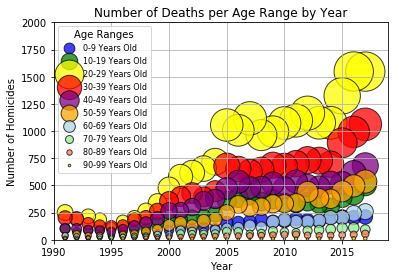

In [114]:
year = age_data['data_year']
range0 = age_data['range_0_9']
range1 = age_data['range_10_19']
range2 = age_data['range_20_29']
range3 = age_data['range_30_39']
range4 = age_data['range_40_49']
range5 = age_data['range_50_59']
range6 = age_data['range_60_69']
range7 = age_data['range_70_79']
range8 = age_data['range_80_89']
range9 = age_data['range_90_99']

plt.scatter(year, range0, marker="o", facecolors="blue", edgecolors="black", alpha=0.75, label='0-9 Years Old' ,s=range0)
plt.scatter(year, range1, marker="o", facecolors="green", edgecolors="black", alpha=0.75, label='10-19 Years Old', s=range1) 
plt.scatter(year, range2, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75, label='20-29 Years Old', s=range2) 
plt.scatter(year, range3, marker="o", facecolors="red", edgecolors="black", alpha=0.75, label='30-39 Years Old', s=range3) 
plt.scatter(year, range4, marker="o", facecolors="purple", edgecolors="black", alpha=0.75, label='40-49 Years Old', s=range4) 
plt.scatter(year, range5,  marker="o", facecolors="orange", edgecolors="black", alpha=0.75, label='50-59 Years Old', s=range5) 
plt.scatter(year, range6, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75, label='60-69 Years Old', s=range6) 
plt.scatter(year, range7, marker="o", facecolors="lightgreen", edgecolors="black", alpha=0.75, label='70-79 Years Old', s=range7) 
plt.scatter(year, range8, marker="o", facecolors="coral", edgecolors="black", alpha=0.75, label='80-89 Years Old', s=range8) 
plt.scatter(year, range9, marker="o", facecolors="gold", edgecolors="black", alpha=0.75, label='90-99 Years Old', s=range9) 


#Incorporate the other graph properties
plt.grid()

plt.xlim(left=1990, right=2019)
plt.ylim(bottom=0, top=2000)

plt.xlabel("Year")
plt.ylabel("Number of Homicides")
plt.title("Number of Deaths per Age Range by Year")

#Create a legend
plt.legend(fontsize = 8, title= "Age Ranges", loc="best") 

#Save Figure
#plt.savefig("Images/LatitudevsMaxTemp.png", bbox_inches="tight")

#Show plot
plt.show()

In [112]:
plot = 

plot(year, range0, marker="o", facecolors="blue", edgecolors="black", alpha=0.75, label='0-9 Years Old' ,s=range0)
plot(year, range1, marker="o", facecolors="green", edgecolors="black", alpha=0.75, label='10-19 Years Old', s=range1) 
plot(year, range2, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75, label='20-29 Years Old', s=range2) 
plot(year, range3, marker="o", facecolors="red", edgecolors="black", alpha=0.75, label='30-39 Years Old', s=range3) 
plot(year, range4, marker="o", facecolors="purple", edgecolors="black", alpha=0.75, label='40-49 Years Old', s=range4) 
plot(year, range5,  marker="o", facecolors="orange", edgecolors="black", alpha=0.75, label='50-59 Years Old', s=range5) 
plot(year, range6, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75, label='60-69 Years Old', s=range6) 
plot(year, range7, marker="o", facecolors="lightgreen", edgecolors="black", alpha=0.75, label='70-79 Years Old', s=range7) 
plot(year, range8, marker="o", facecolors="coral", edgecolors="black", alpha=0.75, label='80-89 Years Old', s=range8) 
plot(year, range9, marker="o", facecolors="gold", edgecolors="black", alpha=0.75, label='90-99 Years Old', s=range9) 

NameError: name 'plot' is not defined

In [ ]:
#Ethnicity data counts by hispanic vs. non-hispanic.  Not sure what multiple means or what ethnicities are encompassed by "unknown"
#Federal policy classifies "hispanic" as ethnicity, not race

eth_data = pd.DataFrame(ethnicity_response['results'])
eth_data.sort_values(by='data_year', ascending=False)

eth_data.head()

In [4]:
# Sex data - male, female and unknown by year

sex_data = pd.DataFrame(sex_response['results'])
sex_data.sort_values(by='data_year', ascending=False)

sex_data.head()

,data_year,female_count,male_count,unknown
0,2008,773,2449,28
1,2011,904,2619,13
2,2003,634,1491,7
3,2006,829,2548,25
4,2009,863,2579,8


In [ ]:
# Race data - american_indian, asian, black, native_hawaiian, and white by year.  Not sure what "unknown" encompasses.

race_data = pd.DataFrame(race_response['results'])
race_data.sort_values(by='data_year', ascending=False)

race_data.head()

In [6]:
# Relationship data ... looooots of categories

rel_data = pd.DataFrame(relationship_response['results'])
rel_data.sort_values(by='data_year', ascending=False)

rel_data.head()


,acquaintance,babysittee,boyfriend_girlfriend,child,child_boyfriend_girlfriend,common_law_spouse,data_year,employee,employer,ex_spouse,...,other_family_member,otherwise_known,parent,relationship_unknown,sibling,spouse,stepchild,stepparent,stepsibling,stranger
0,836,11,173,148,27,16,2008,1,1,21,...,68,278,61,1465,39,153,17,10,5,670
1,196,2,29,17,5,8,1995,0,0,5,...,17,18,3,114,10,42,0,0,0,125
2,901,12,204,148,31,19,2011,1,3,22,...,73,297,70,1625,42,183,13,16,4,565
3,940,10,194,147,25,9,2013,0,1,14,...,56,321,80,1618,47,197,10,10,2,553
4,583,4,138,102,14,14,2003,3,6,11,...,44,159,48,850,23,129,11,9,2,411
